In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Proyek Analisis Data: [Bike Sharing Dataset(day)]
- **Nama:** [Rozaq Leksono]
- **Email:** [Rozaql47@gmail.com]
- **ID Dicoding:** [rozaq_l_H0Mn]

## Menentukan Pertanyaan Bisnis

- Apakah hari berpengaruh terhadap jumlah penyewaan Sepeda?
- Apakah Musim berpengaruh terhadap jumlah penyewaan Sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/BIKE/day.csv", delimiter=",")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data yang digunakan adalah dataset "day" dari dataset Bike
- bisa dilihat di atas ada beberapa kolom yang akan bisa digunakan untuk menjawab pertanyaan bisnis yang akan kita tanyakan


### Assessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dari pengecekan di atas bisa ditemukan nama colom dan type data dari dataset yaitu
-jumlah kolom = 15
-type data = float(4), int(64), dan object(1)

### Mengecek missing value dan dupliace data


In [5]:
# Memeriksa missing value pada data
print("Jumlah Missing value: ",data.isna().sum())
# Memeriksa duplikasi pada data
print("Jumlah duplikasi: ",data.duplicated().sum())
data.describe()

Jumlah Missing value:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari pengecekan di atas tidak ditemukan duplikai dan missing value
- penulisan kolom dan nilai menyulitkan untuk dibaca
- Terdapat Kolom yang tidak diperlukan/sulit untuk diolah

### Cleaning Data

In [6]:
# Menghapus kolom yang tidak diperlukan
data.drop(columns=['yr'], inplace=True)
data.drop(columns=['workingday'], inplace=True)
data.drop(columns=['holiday'], inplace=True)

In [7]:
# Mengubah nama kolom pada data
data.rename(columns={
    'mnth': 'month',
    'weekday': 'a_week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'hum': 'humidity',
    'cnt': 'count_cr'
}, inplace=True)

In [8]:
# Memperbaiki nilai pada kolom month
month_name = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
data['month'] = data['month'].map(month_name)

In [9]:
# Memperbaiki nilai pada kolom season/musim
season_name = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
data['season'] = data['season'].map(season_name)

In [10]:
# Memperbaiki nilai pada kolom a_week/hari
day_name = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
data['a_week'] = data['a_week'].map(day_name)

In [11]:
# Memperbaiki nilai pada kolom weather
weather_name = {
    1: 'Sunny',
    2: 'Fogy',
    3: 'Rainy',
    4: 'Stormy'
}
data['weather_situation'] = data['weather_situation'].map(weather_name)

In [12]:
# Membulatkan nilai
data['humidity'] = data['humidity']*100
data['temp'] = data['temp']*41
data['atemp'] = data['atemp']*50
data['wind_speed'] = data['wind_speed']*67

In [13]:
# Menetukan kategori hari
weekends = {'Saturday', 'Sunday'}

def categorize_day(day):
    if day in weekends:
        return 'Weekend'
    else:
        return 'Weekday'

data['day_category'] = data['a_week'].apply(categorize_day)


In [14]:
# Menentukan kondisi kelembaban
def categorize_humidity(humidity):
    if humidity <= 35:
        return 'Low'
    elif humidity <= 70:
        return 'Medium'
    else:
        return 'High'

data['humidity_category'] = data['humidity'].apply(categorize_humidity)

In [15]:
data.head()

,instant,dteday,season,month,a_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
0,1,2011-01-01,Spring,January,Saturday,Fogy,14.110847,18.18125,80.5833,10.749882,331,654,985,Weekend,High
1,2,2011-01-02,Spring,January,Sunday,Fogy,14.902598,17.68695,69.6087,16.652113,131,670,801,Weekend,Medium
2,3,2011-01-03,Spring,January,Monday,Sunny,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Weekday,Medium
3,4,2011-01-04,Spring,January,Tuesday,Sunny,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Weekday,Medium
4,5,2011-01-05,Spring,January,Wednesday,Sunny,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Weekday,Medium


**Insight:**
- Setelah melalui proses cleaning dapat dilihat data sekarang sudah lebih muda untuk dibaca dan divisualisasikan

## Exploratory Data Analysis (EDA)

### Explore data untuk pertanyaan bisnis

** penyewa sepeda per hari**


In [16]:
# Memeriksa total data per hari
data.groupby(by='a_week').agg({
    'count_cr': 'sum'
}).sort_values(by='count_cr', ascending=False)

,count_cr
a_week,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


**penyewa sepeda per musim**


In [17]:
# Memeriksa total data per musim
data.groupby(by='season').agg({
    'count_cr': 'sum'
}).sort_values(by='count_cr', ascending=False)

,count_cr
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


**penyewa sepeda per bulan**


In [18]:
# Memeriksa total data penyewa sepeda perbulan
data.groupby(by='month').agg({
    'count_cr': 'sum'
}).sort_values(by='count_cr', ascending=False)

,count_cr
month,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


**Insight:**
- dari tabel di atas tersebut sebenarnya kita sudah bisa mengetahui jawaban dari pertanyaan bisnis di atas akan tetapi ini kurang menarik dan memakan waktu yang agak lama untuk dibaca

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah hari berpengaruh terhadap jumlah penyewaan Sepeda?


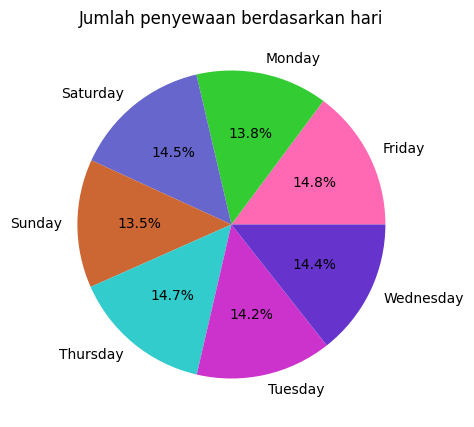

In [19]:
# Mengelompokkan data perhari dengan jumlah penyewaan sepeda
daily_users_df = data.groupby(by="a_week").count_cr.sum().reset_index()
daily_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# Plot data
plt.figure(figsize=(10, 5))
plt.pie(daily_users_df['count_cr'], labels=daily_users_df['a_week'], colors=["#FF69B4", "#33CC33", "#6666CC", "#CC6633", "#33CCCC", "#CC33CC", "#6633CC"], autopct='%1.1f%%')
plt.title('Jumlah penyewaan berdasarkan hari')
plt.show()


Grafik di atas menunjukkan jumlah penyewaan sepeda berdasarkan hari, dengan puncaknya pada hari Jum'at/Friday.

### Pertanyaan 2: Apakah Musim berpengaruh terhadap jumlah penyewaan Sepeda?

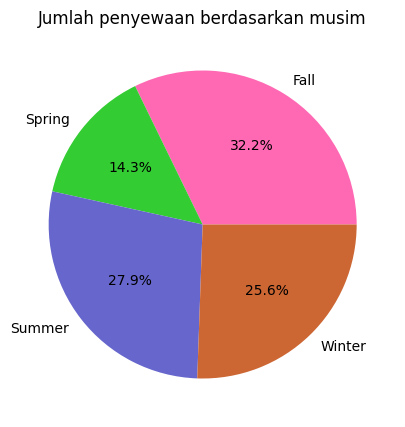

In [20]:
# Mengelompokkan data per musim dengan jumlah penyewaan sepeda
season_users_df = data.groupby(by="season").count_cr.sum().reset_index()

# Plot data
plt.figure(figsize=(10, 5))
plt.pie(season_users_df['count_cr'], labels=season_users_df['season'], colors=["#FF69B4", "#33CC33", "#6666CC", "#CC6633"], autopct='%1.1f%%')
plt.title('Jumlah penyewaan berdasarkan musim')
plt.show()


Grafik di atas menunjukkan jumlah penyewaan sepeda berdasarkan musim, dengan puncaknya pada Musim Gugur/Fall.

**Insight:**
- Dari hasil visualisasi di atas kita dapat menjawab dan menyimpulkan pertanyaan di atas dengan cepat
- jawaban pertanyaan no 1 adalah Jum'at/Friday
- jawaban pertanyaan no 2 adalah Musim Gugur/Fall

## Conclusion

- Conclution pertanyaan 1
dari pembuktian data di atas Persentase penyewaan sepeda tidak secara signifikan dipengaruhi oleh kondisi hari. Kondisi hari libur atau weekend mungkin menyebabkan peningkatan penyewaan, akan tetapi ini tidak terlalu signifikan(dilihat dari peningkatannya yang hanya dikisaran 1%).

- Conclution pertanyaan 2
berdasarkan data di atas dapat dilihat persentase penyewaan sepeda secara signifikan dipengaruhi kondisi musim, yang dimana puncaknya terjadi pada musim gugur dan titik terendahnya terdapat pada musim panas, hal ini mungkin didasarkan pada fakta ketika musim panas orang-orang cenderung memilih alternatif kendaraan lain meningat kondisi cuaca yang panas dan juga sebaliknya ketika kondisi sinar matahari tidak terlalu kuat orang-orang cenderung memilih untuk menggunakan sepeda.